In [ ]:
# 美国GNP季度增长率分析

In [68]:
from math import sqrt
import pandas as pd
from statsmodels.tsa import ar_model
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.*', FutureWarning)

In [38]:
# load data
fpath = '../../data/dgnp82.txt.gz'
gnp = pd.read_csv(fpath, header=None, names=['gnp'])

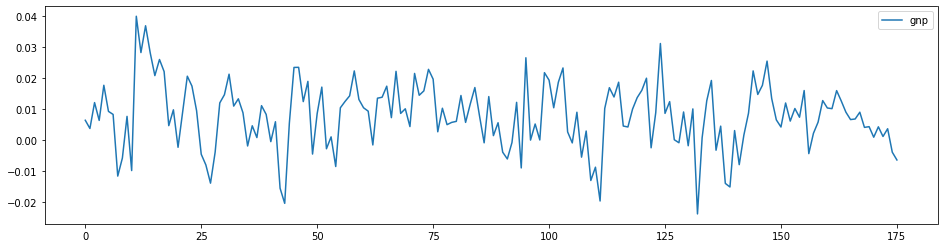

In [39]:
gnp.plot(figsize=(16,4));

In [7]:
# create a time-series range
gnp1 = pd.date_range(start='1947-04-01', end='1991-04-01', freq='Q')
print(gnp1)

DatetimeIndex(['1947-06-30', '1947-09-30', '1947-12-31', '1948-03-31',
               '1948-06-30', '1948-09-30', '1948-12-31', '1949-03-31',
               '1949-06-30', '1949-09-30',
               ...
               '1988-12-31', '1989-03-31', '1989-06-30', '1989-09-30',
               '1989-12-31', '1990-03-31', '1990-06-30', '1990-09-30',
               '1990-12-31', '1991-03-31'],
              dtype='datetime64[ns]', length=176, freq='Q-DEC')


In [40]:
gnp.set_index(gnp1)

,gnp
1947-06-30,0.00632
1947-09-30,0.00366
1947-12-31,0.01202
1948-03-31,0.00627
1948-06-30,0.01761
...,...
1990-03-31,0.00420
1990-06-30,0.00108
1990-09-30,0.00358
1990-12-31,-0.00399


In [60]:
# Auto select order
m = ar_model.ar_select_order(gnp, maxlag=13, ic='aic', old_names=False)
# choose 1,2,3
print(m.ar_lags)
res = m.model.fit()
print(res.summary())

[1 2 3]
                            AutoReg Model Results                             
Dep. Variable:                    gnp   No. Observations:                  176
Model:                     AutoReg(3)   Log Likelihood                 555.080
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Tue, 20 Oct 2020   AIC                             -9.197
Time:                        21:51:19   BIC                             -9.106
Sample:                             3   HQIC                            -9.160
                                  176                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.001      4.496      0.000       0.003       0.007
gnp.L1         0.3509      0.075      4.655      0.000       0.203       0.499
gnp.L2         0.1809      0.079      2.296 

In [64]:
# use arima
m2 = ARIMA(gnp, order=(3,0,0))
arma_res = m2.fit()

In [65]:
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                    gnp   No. Observations:                  176
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 565.842
Date:                Tue, 20 Oct 2020   AIC                          -1121.685
Time:                        21:54:07   BIC                          -1105.832
Sample:                             0   HQIC                         -1115.255
                                - 176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.001      6.176      0.000       0.005       0.010
ar.L1          0.3488      0.071      4.910      0.000       0.210       0.488
ar.L2          0.1784      0.073      2.452      0.0

In [78]:
# Therefore , the constant term is 0.0077
# redisual standard error
arma_res.cov_params()

,const,ar.L1,ar.L2,ar.L3,sigma2
const,1.544663e-06,5.238506e-06,2.125790e-05,-1.206264e-06,-5.365875e-10
ar.L1,5.238506e-06,5.045344e-03,-1.313609e-03,-1.589593e-03,1.519379e-07
ar.L2,2.125790e-05,-1.313609e-03,5.293346e-03,-1.307919e-03,-1.505929e-07
ar.L3,-1.206264e-06,-1.589593e-03,-1.307919e-03,5.191442e-03,5.232156e-08
sigma2,-5.365875e-10,1.519379e-07,-1.505929e-07,5.232156e-08,8.081098e-11


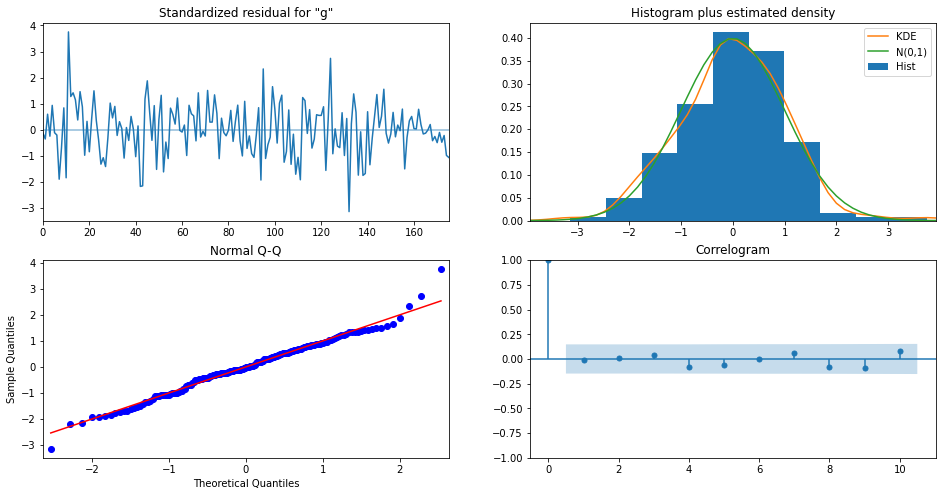

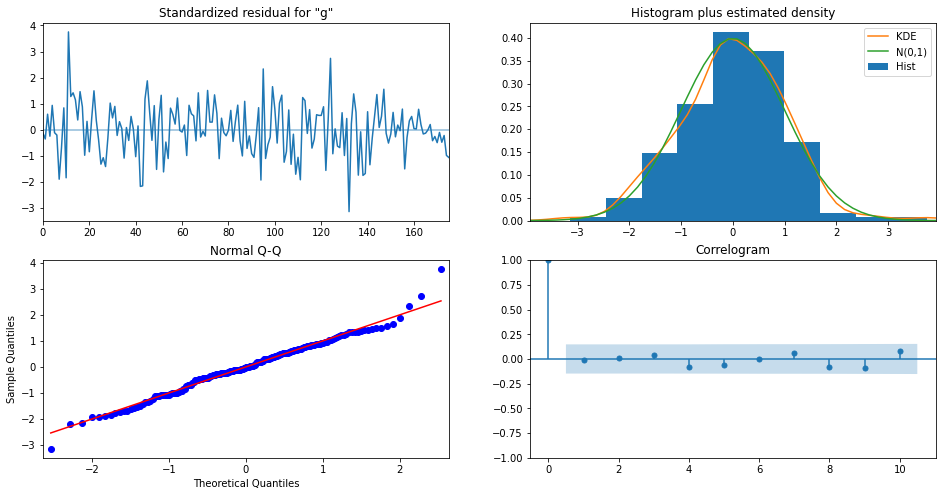

In [71]:
arma_res.plot_diagnostics(figsize=(16,8))